In [8]:
import pandas as pd
import numpy as np

n = 10000

dates = pd.date_range(start="2025-01-01", end="2025-02-28")
random_dates = np.random.choice(dates, size=n)

napos = np.random.randint(1, 61, size=n)

df = pd.DataFrame({
    "sorszam": range(1, n + 1),
    "datum": random_dates,
    "irat_napok": napos
})

# Biztosítjuk, hogy dátum dtype legyen
df["datum"] = pd.to_datetime(df["datum"])

print(df.dtypes)
print(df)


sorszam                int64
datum         datetime64[ns]
irat_napok             int64
dtype: object
      sorszam      datum  irat_napok
0           1 2025-02-28          34
1           2 2025-01-15          35
2           3 2025-01-03          18
3           4 2025-01-07          32
4           5 2025-02-02          41
...       ...        ...         ...
9995     9996 2025-02-13          18
9996     9997 2025-01-29          30
9997     9998 2025-02-27          22
9998     9999 2025-01-14          26
9999    10000 2025-01-29          21

[10000 rows x 3 columns]


In [9]:
df["kategoriak"] = pd.cut(
    df["irat_napok"],
    bins=[0, 15, 30, df["irat_napok"].max()],
    labels=["0-15", "16-30", "30+"],
    right=True
)

eredmeny = (
    df.groupby(["datum", "kategoriak"], observed=False)
      .size()
      .unstack(fill_value=0)
)

eredmeny = eredmeny.sort_index()
eredmeny_reset = eredmeny.reset_index()

print(eredmeny)


kategoriak  0-15  16-30  30+
datum                       
2025-01-01    42     39   74
2025-01-02    49     42   93
2025-01-03    47     42   96
2025-01-04    44     37   83
2025-01-05    43     48   93
2025-01-06    48     40   89
2025-01-07    46     45   86
2025-01-08    46     46  102
2025-01-09    45     47   90
2025-01-10    47     38   80
2025-01-11    34     44   82
2025-01-12    48     44   91
2025-01-13    44     41   81
2025-01-14    42     50   86
2025-01-15    49     38  105
2025-01-16    44     63   87
2025-01-17    37     37   97
2025-01-18    49     56   86
2025-01-19    32     42   73
2025-01-20    44     45   61
2025-01-21    44     39   78
2025-01-22    52     37   90
2025-01-23    38     43   89
2025-01-24    39     38  102
2025-01-25    42     49   91
2025-01-26    51     42   78
2025-01-27    37     42   97
2025-01-28    44     38   77
2025-01-29    53     43   76
2025-01-30    39     34   87
2025-01-31    45     43   91
2025-02-01    43     47   85
2025-02-02    

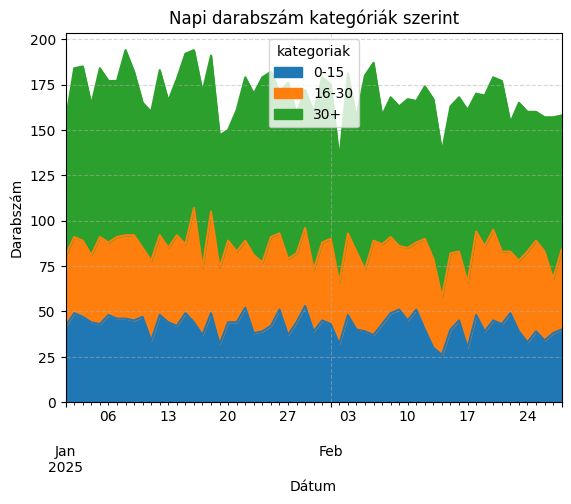

In [10]:
import matplotlib.pyplot as plt
# Ha szükséges, a dátum oszlopot datetime típusra konvertáljuk
eredmeny.index = pd.to_datetime(eredmeny.index)

# Halmozott területi diagram
eredmeny_reset.plot(x="datum", y=["0-15","16-30","30+"], kind="area", stacked=True)
plt.title("Napi darabszám kategóriák szerint")
plt.xlabel("Dátum")
plt.ylabel("Darabszám")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()
